<a href="https://colab.research.google.com/github/andyycx/bikesharing/blob/main/bikesharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 9

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
data_url = 'https://raw.githubusercontent.com/andyycx/bikesharing/main/data.csv'
df = pd.read_csv(
    data_url,
    parse_dates=['date'],
    index_col='date',
    dayfirst=True
)



In [ ]:
df.index

DatetimeIndex(['2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01',
               ...
               '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30',
               '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30',
               '2018-11-30', '2018-11-30'],
              dtype='datetime64[ns]', name='date', length=8760, freq=None)

In [ ]:
df.head()

hour  cnt  temp  ...  season  holiday  functioning_day
date                         ...                                  
2017-12-01     0  254  -5.2  ...       1        0                1
2017-12-01     1  204  -5.5  ...       1        0                1
2017-12-01     2  173  -6.0  ...       1        0                1
2017-12-01     3  107  -6.2  ...       1        0                1
2017-12-01     4   78  -6.0  ...       1        0                1

[5 rows x 13 columns]

In [ ]:
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [ ]:
df['month']

date
2017-12-01    12
2017-12-01    12
2017-12-01    12
2017-12-01    12
2017-12-01    12
              ..
2018-11-30    11
2018-11-30    11
2018-11-30    11
2018-11-30    11
2018-11-30    11
Name: month, Length: 8760, dtype: int64

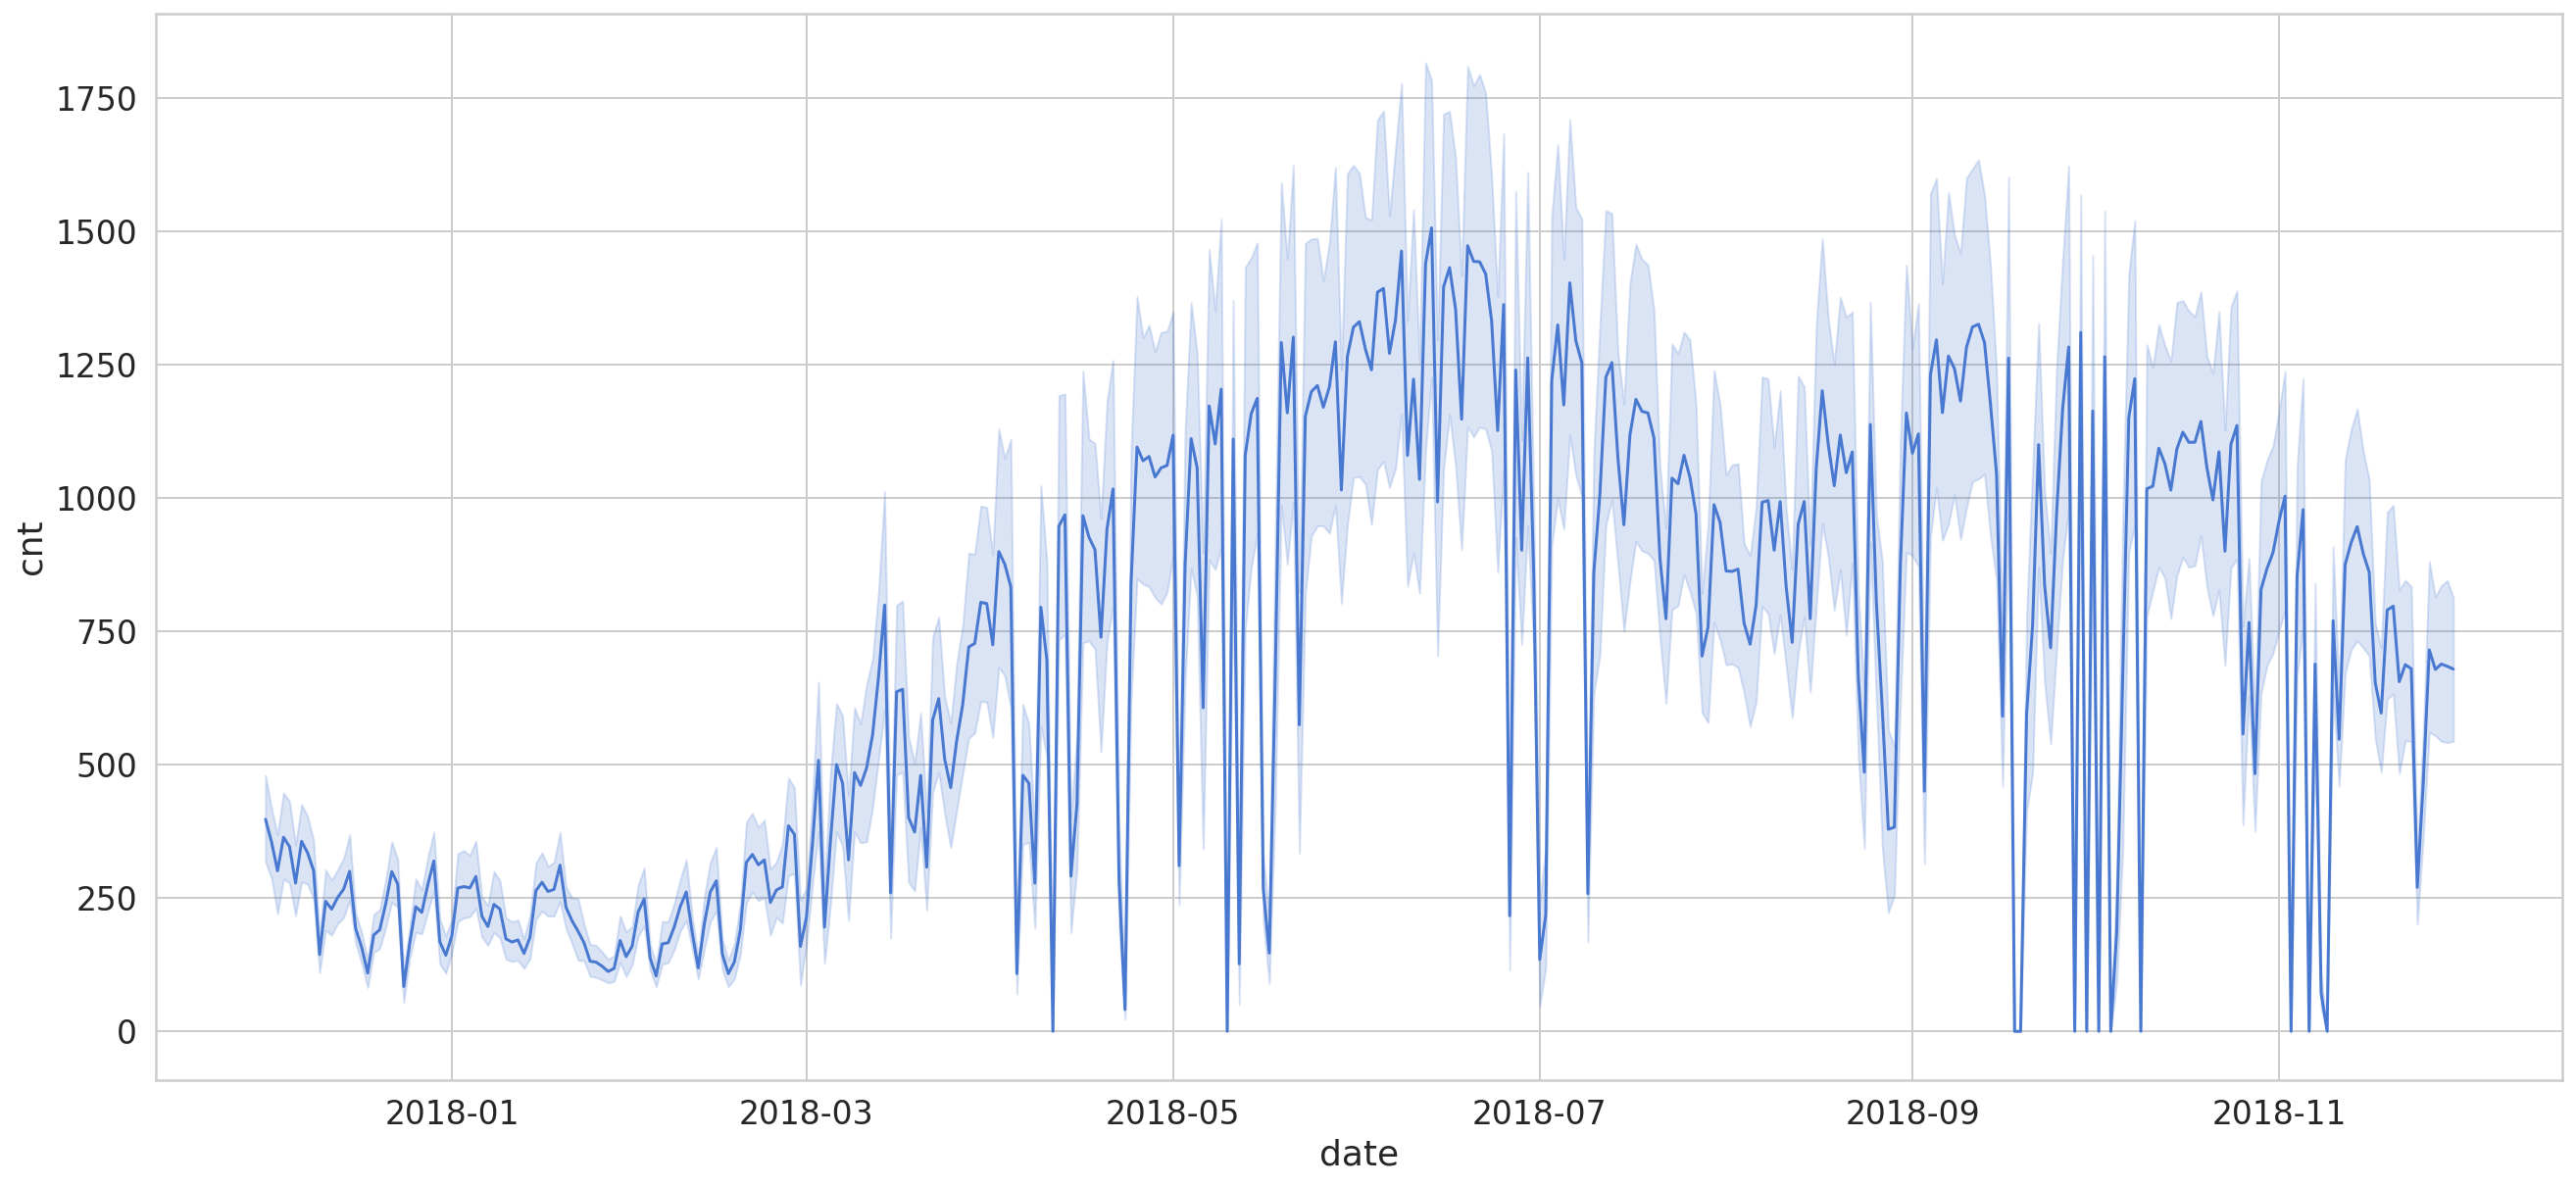

In [ ]:
sns.lineplot(x=df.index, y="cnt", data=df)

In [ ]:
df_by_month = df.resample('M').sum()

In [ ]:
df_by_month

hour     cnt     temp  ...  day_of_month  day_of_week  month
date                               ...                                  
2017-12-31  8556  185330  -1435.0  ...         11904         2376   8928
2018-01-31  8556  150006  -2933.7  ...         11904         2088    744
2018-02-28  7728  151833  -1118.7  ...          9744         2016   1344
2018-03-31  8556  380594   5985.1  ...         11904         2304   2232
2018-04-30  8280  524227   9322.6  ...         11160         2160   2880
2018-05-31  8556  707088  13499.4  ...         11904         2160   3720
2018-06-30  8280  896887  16658.5  ...         11160         2232   4320
2018-07-31  8556  734460  20656.4  ...         11904         2184   5208
2018-08-31  8556  651887  21379.9  ...         11904         2232   5952
2018-09-30  8280  673612  15479.1  ...         11160         2280   6480
2018-10-31  8556  650675   9738.3  ...         11904         2088   7440
2018-11-30  8280  465715   5622.5  ...         11160         2184   7920

[12 rows x 16 columns]

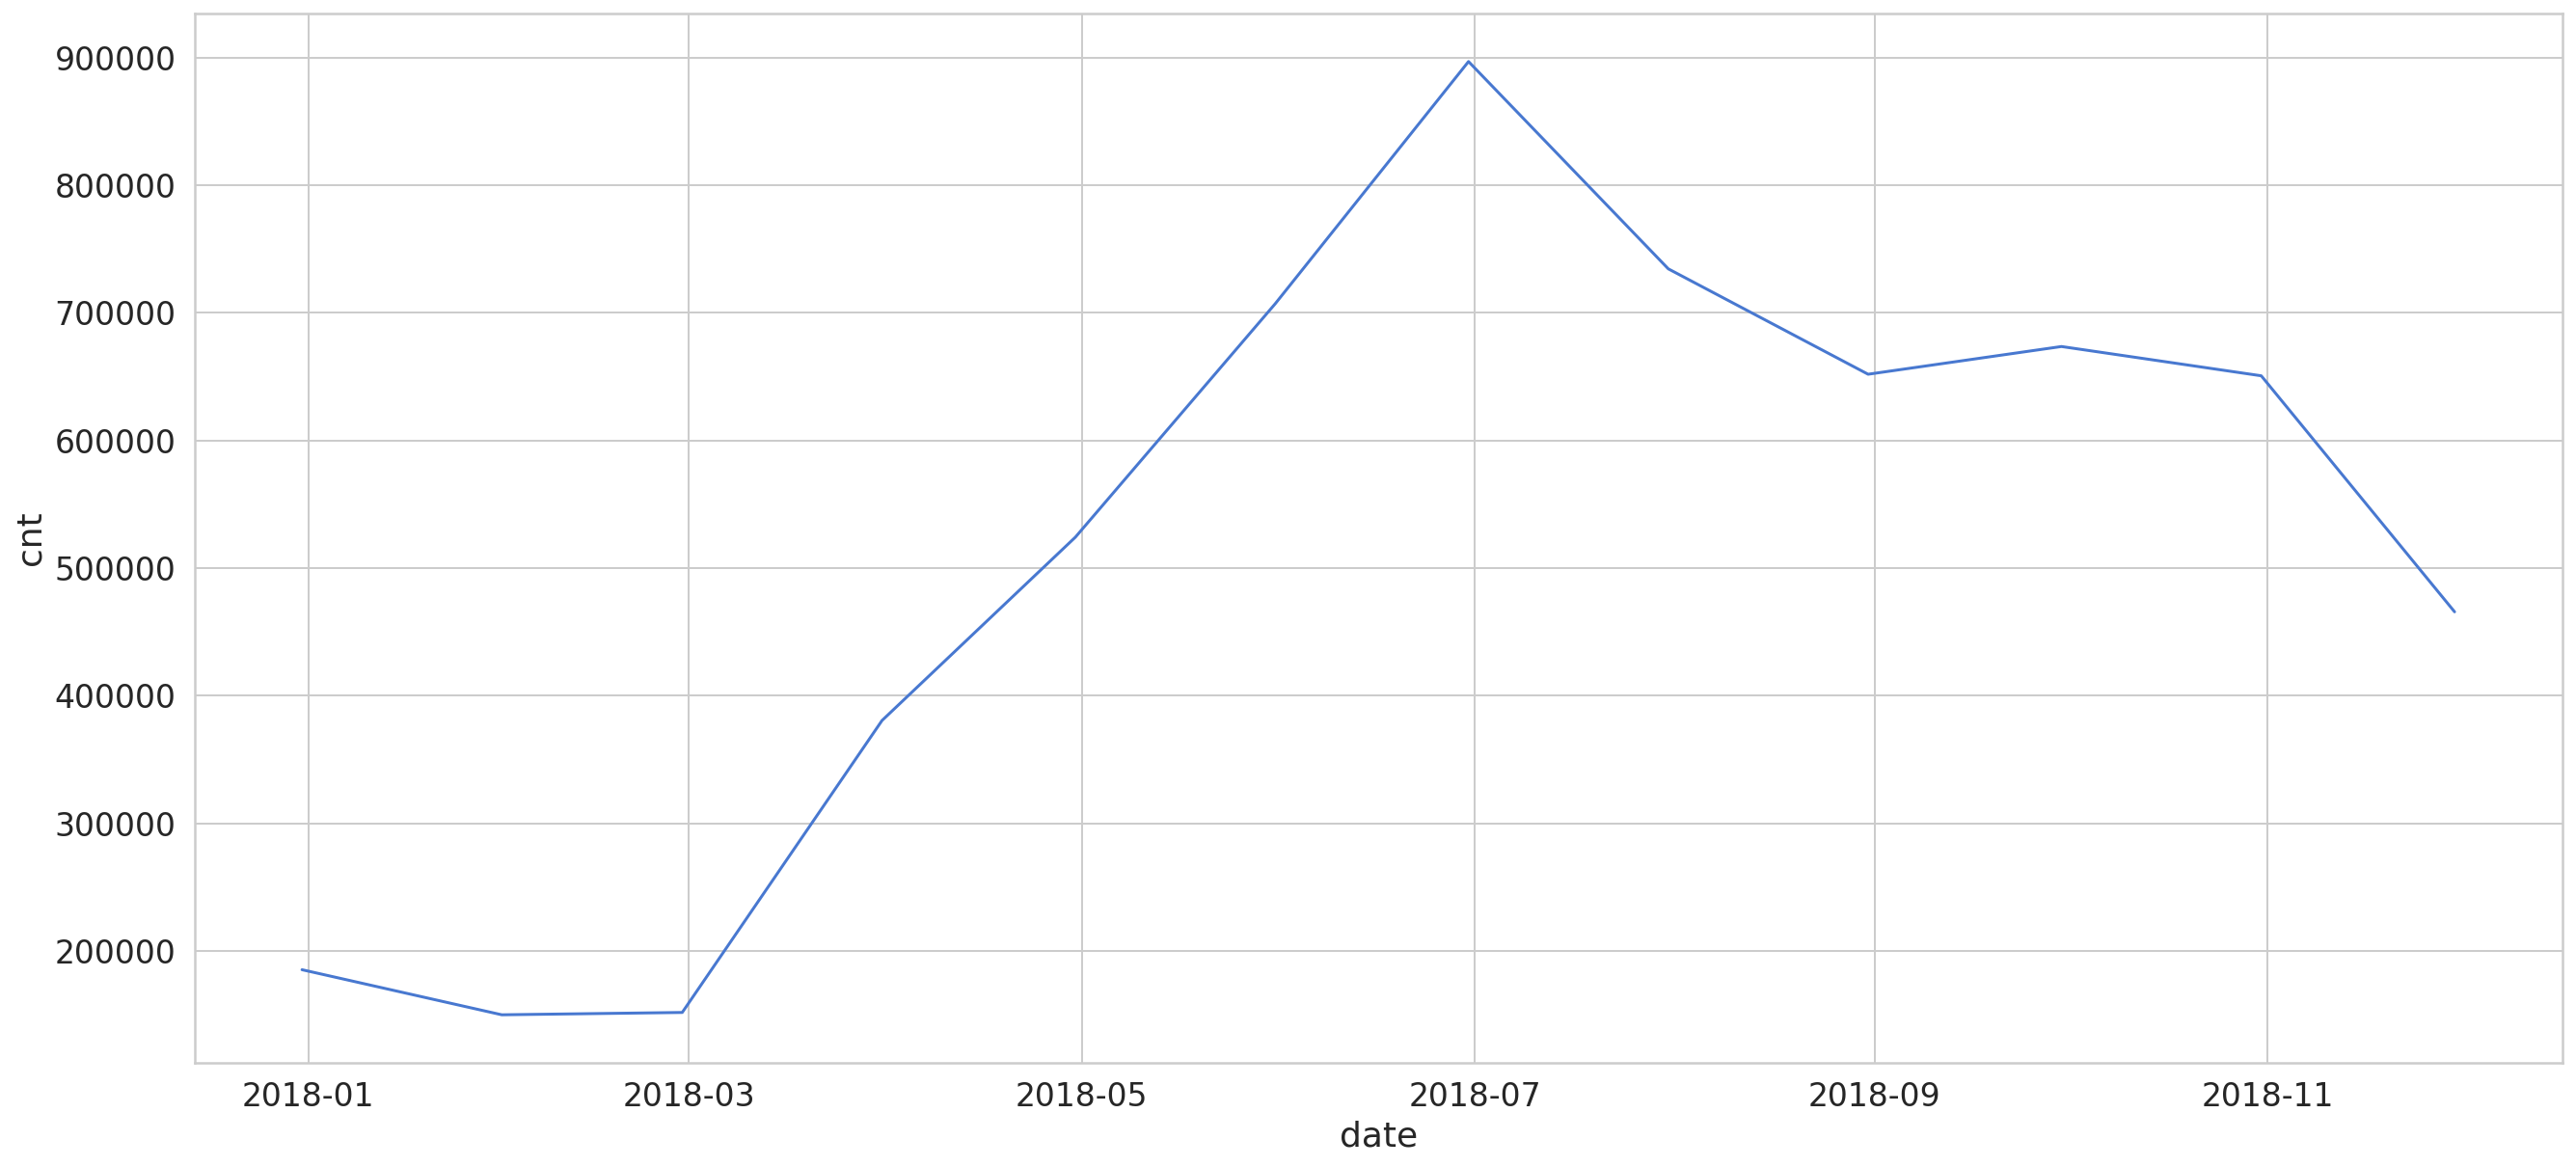

In [ ]:
sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month)

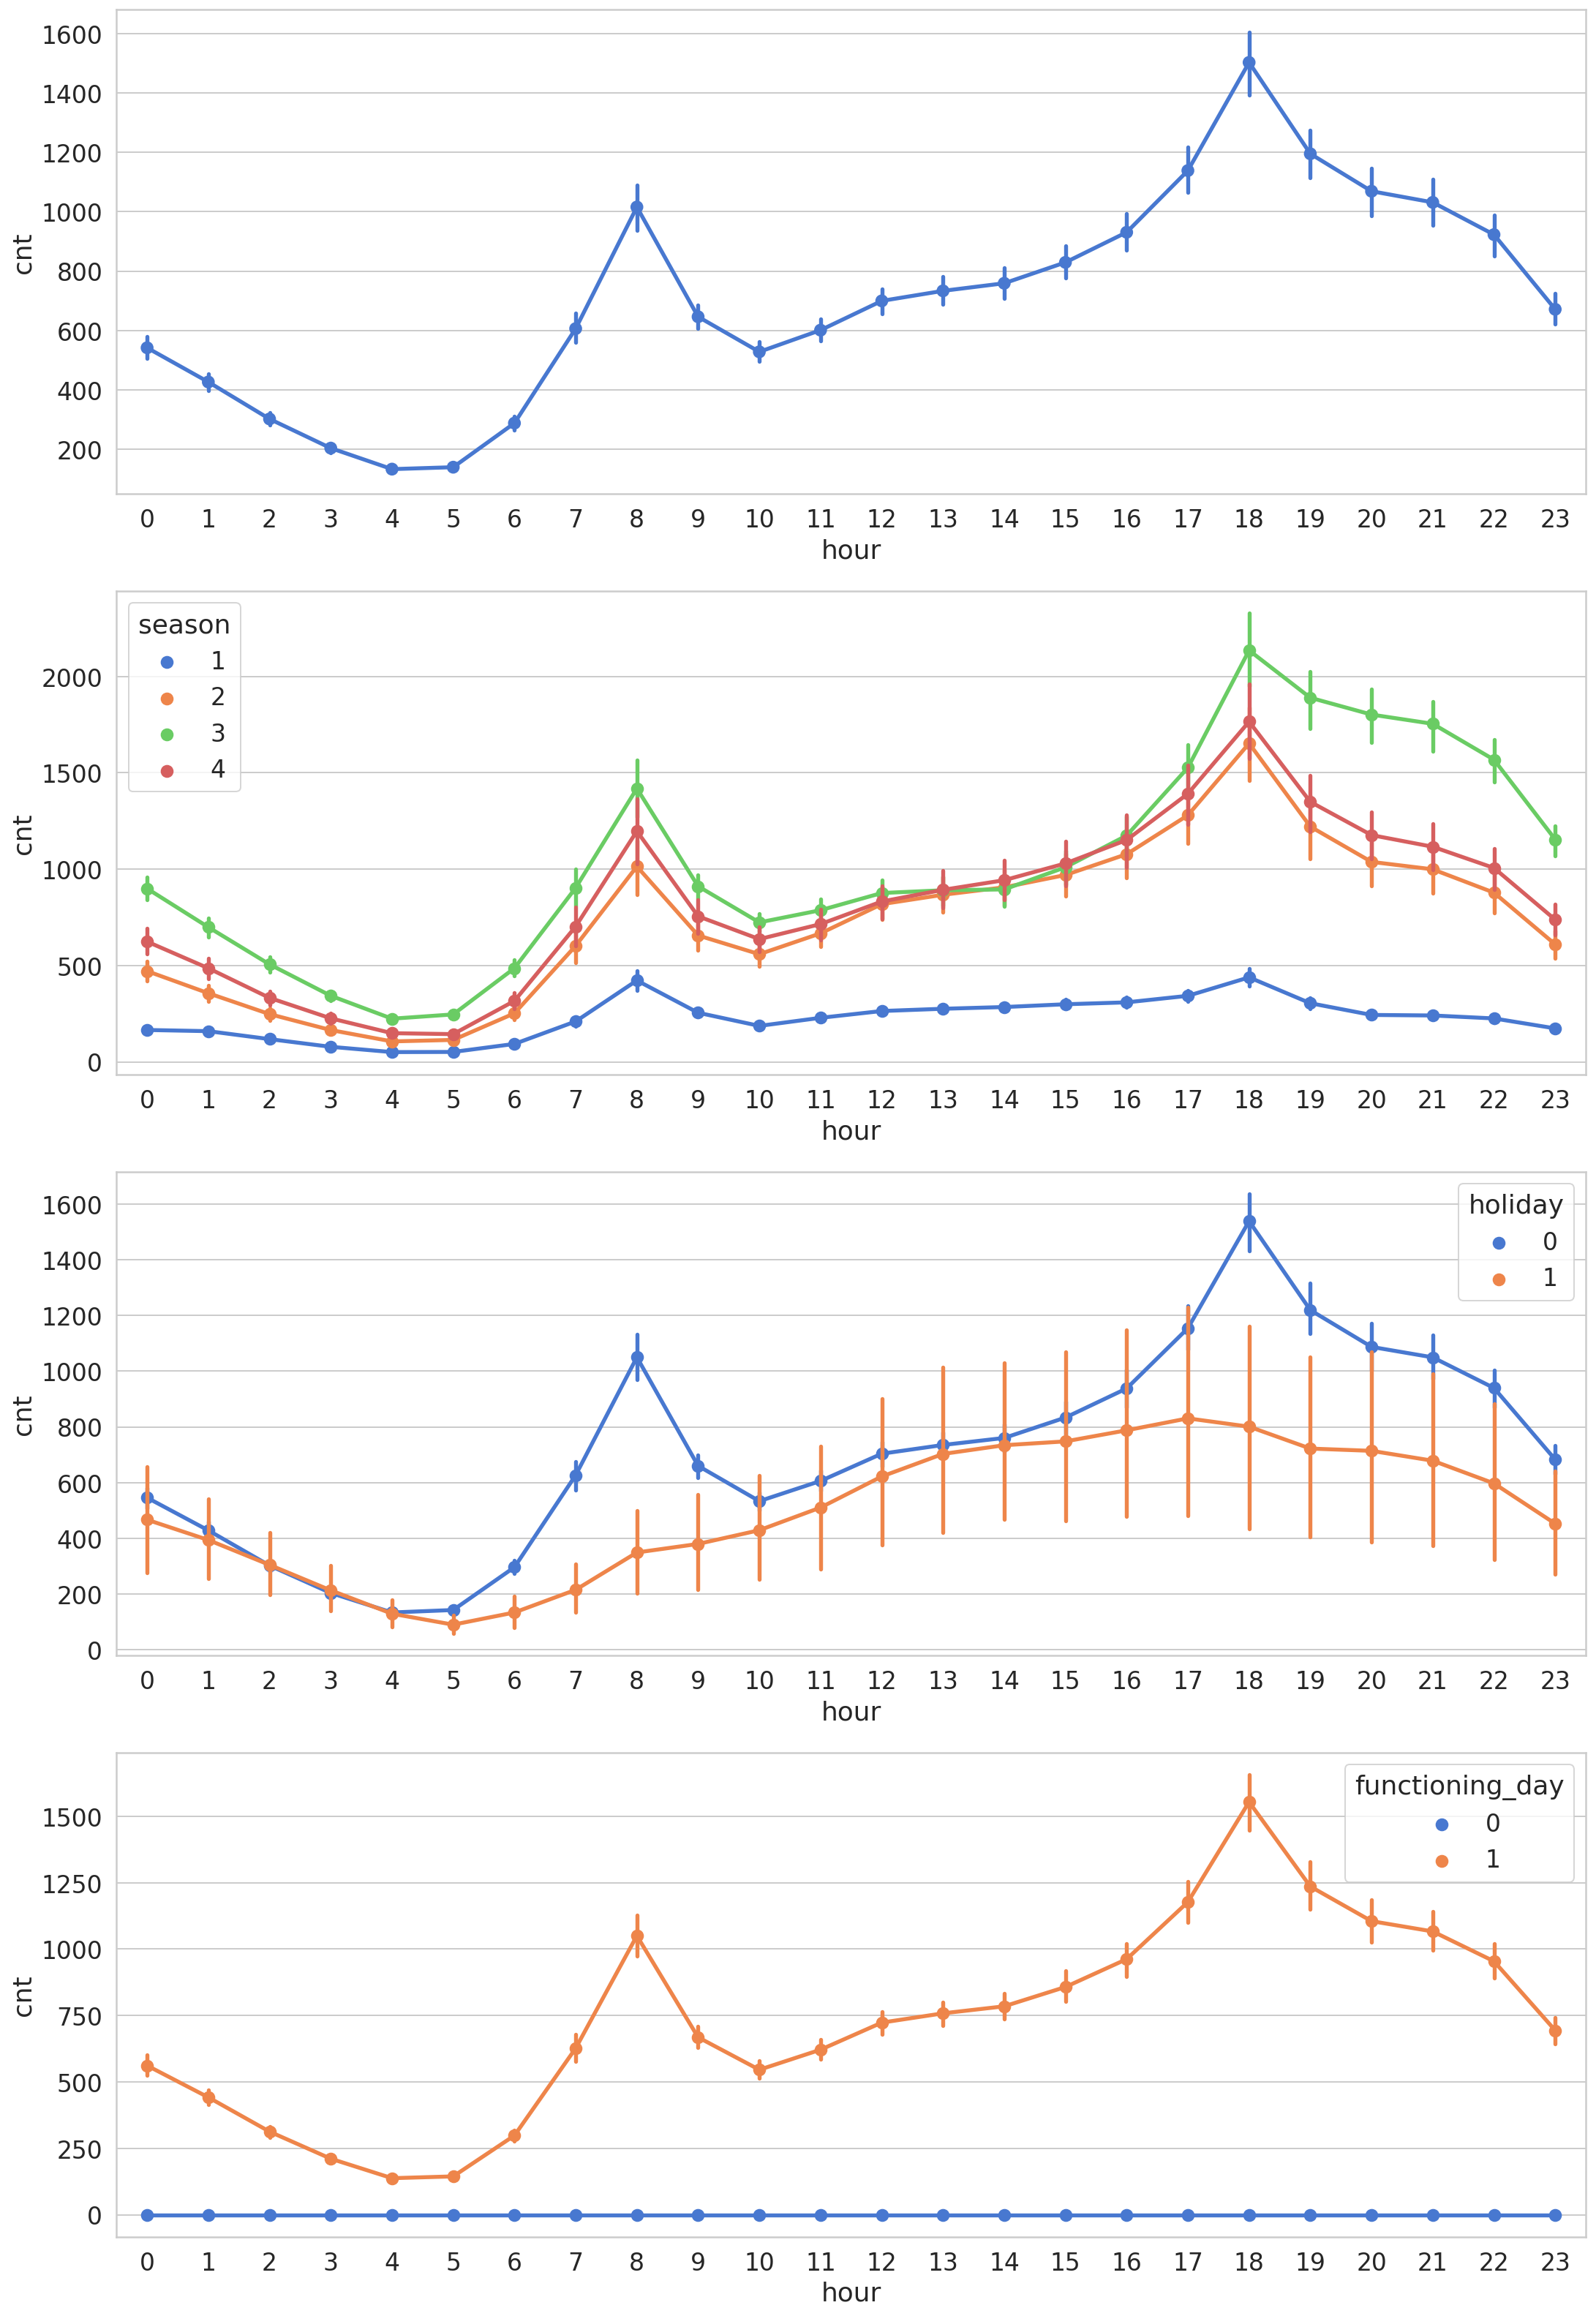

In [ ]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows=4)
fig.set_size_inches(18, 28)

sns.pointplot(data=df, x='hour', y='cnt', ax=ax1)
sns.pointplot(data=df, x='hour', y='cnt', hue='season', ax=ax2)
sns.pointplot(data=df, x='hour', y='cnt', hue='holiday', ax=ax3)
sns.pointplot(data=df, x='hour', y='cnt', hue='functioning_day', ax=ax4);

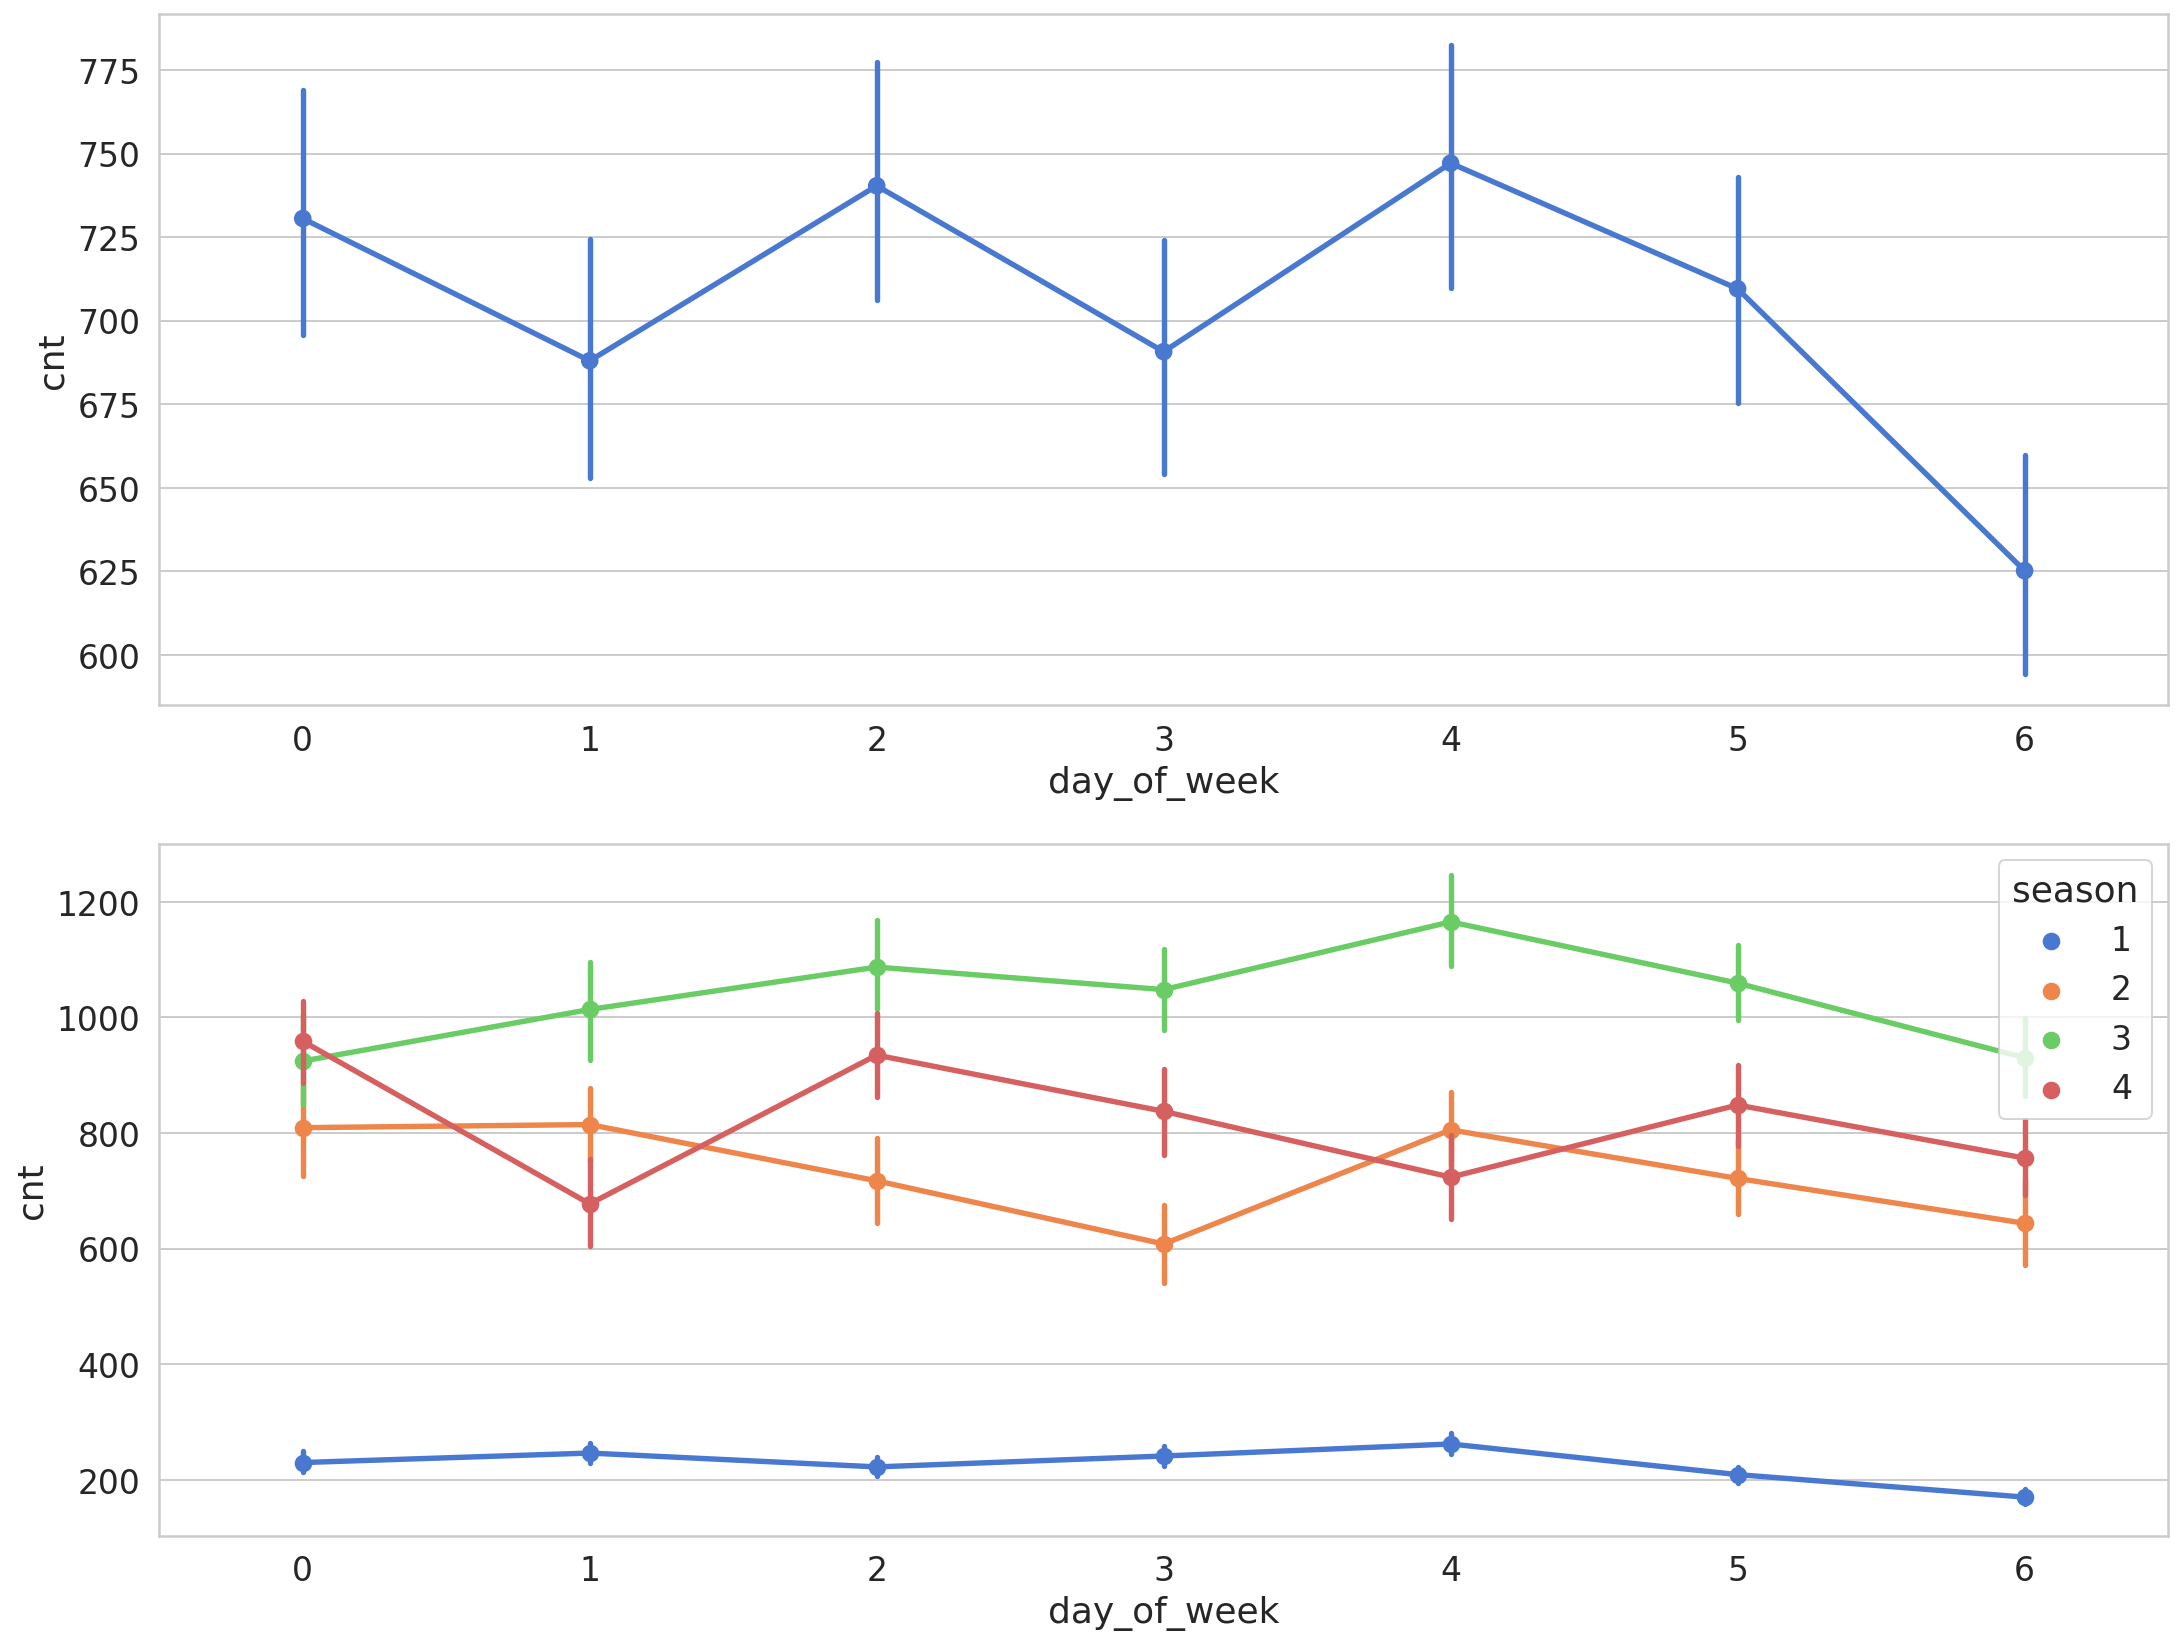

In [ ]:
fig,(ax1, ax2)= plt.subplots(nrows=2)
fig.set_size_inches(18, 14)

sns.pointplot(data=df, x='day_of_week', y='cnt', ax=ax1)
sns.pointplot(data=df, x='day_of_week', y='cnt', hue='season', ax=ax2);

In [ ]:
del df['functioning_day']
del df['dew_point_temp']

In [ ]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(train.shape, test.shape)

(7884, 14) (876, 14)


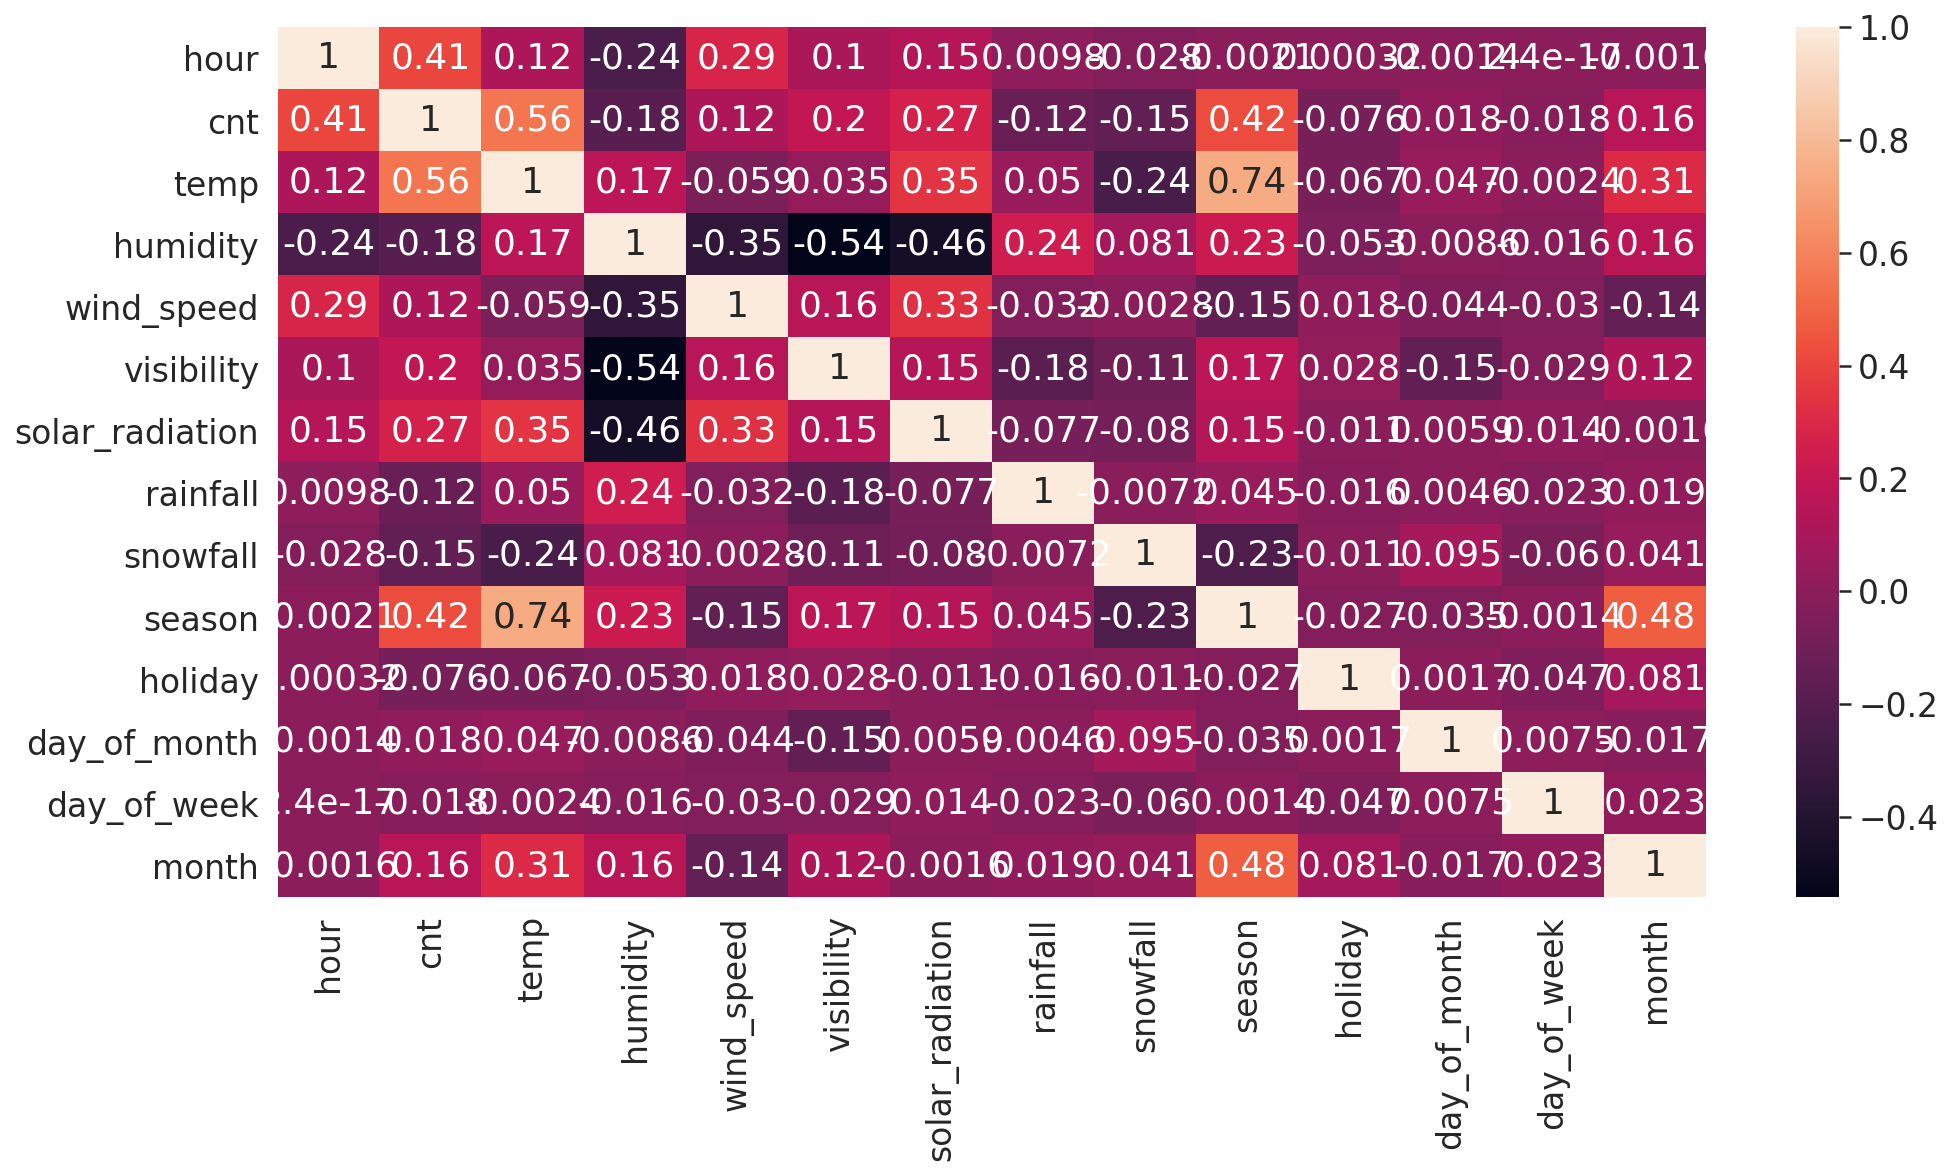

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler

f_columns = ['temp', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

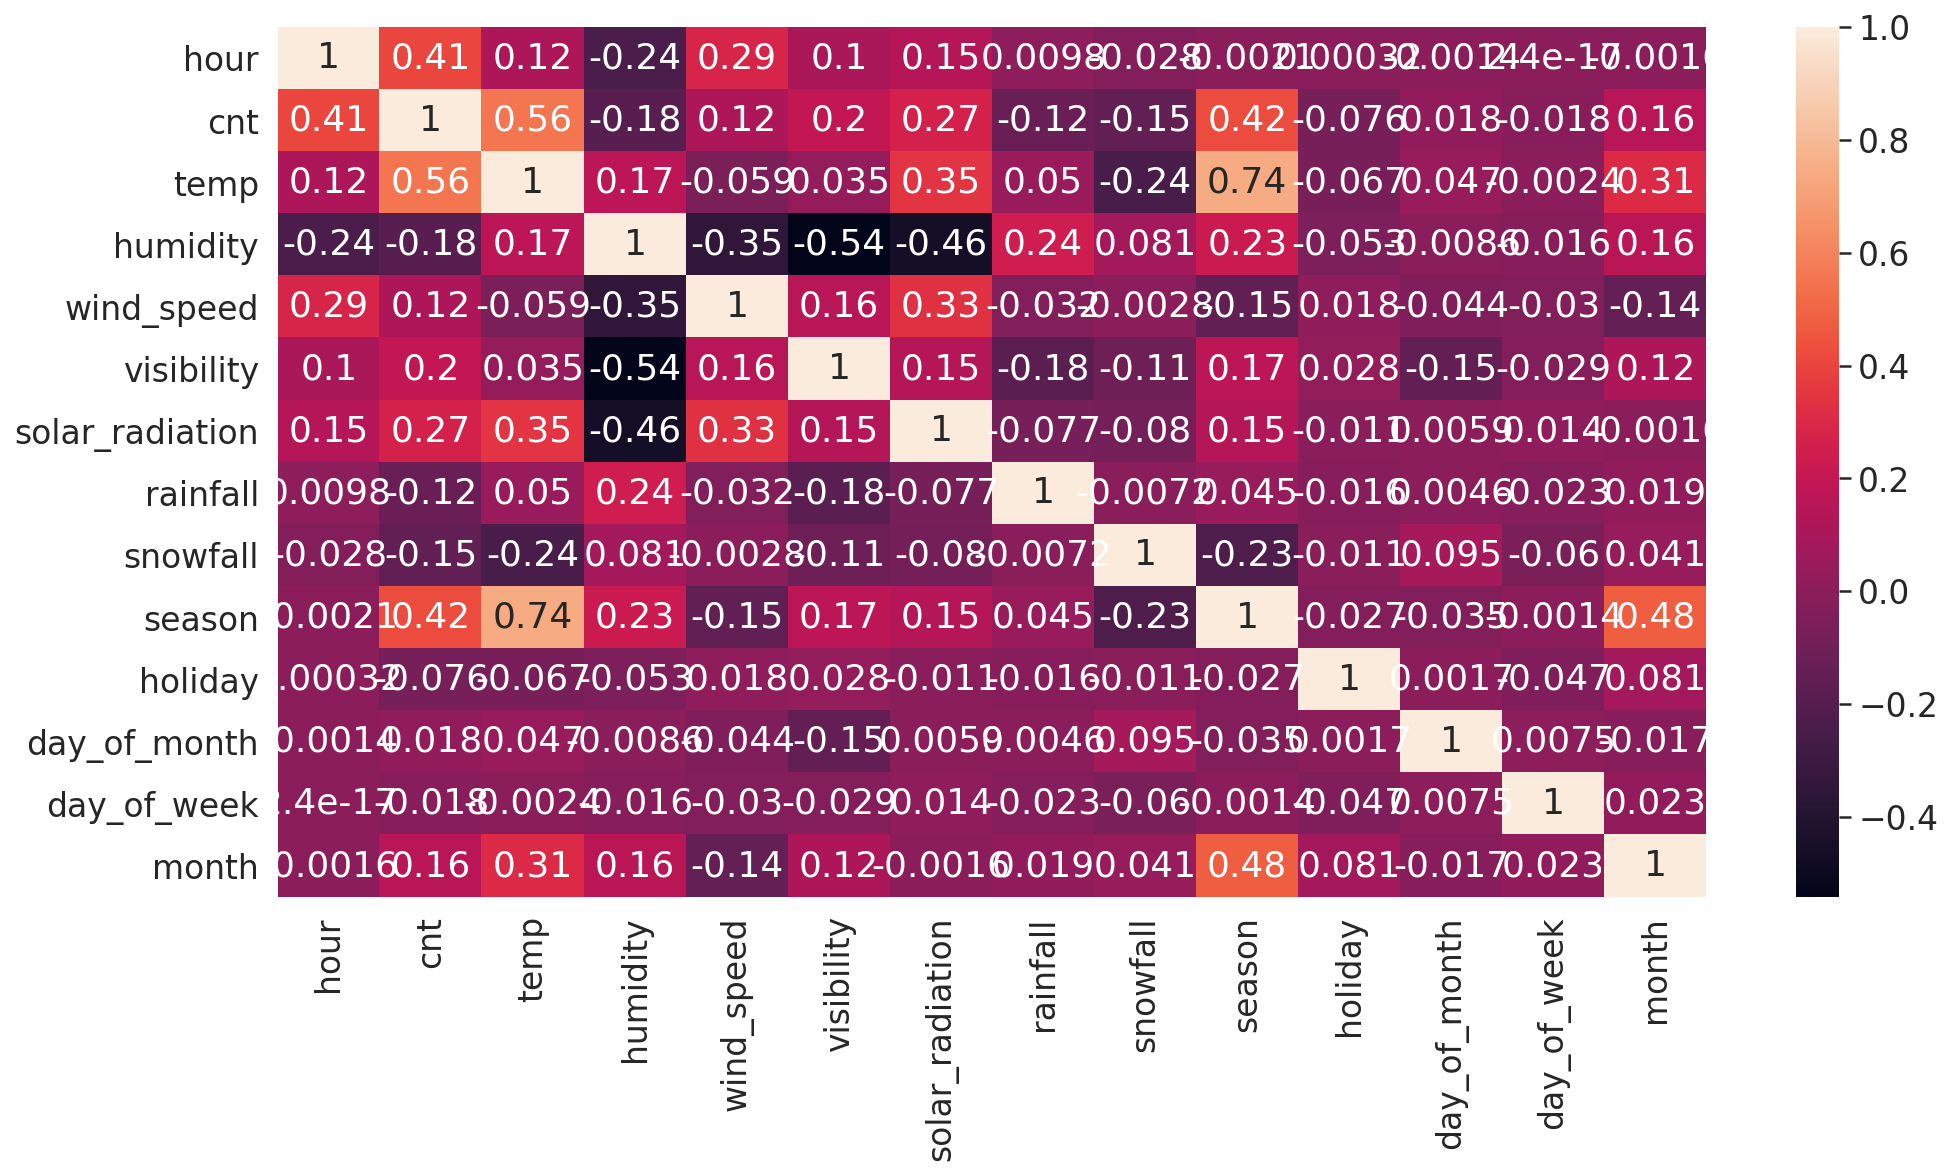

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), annot=True)
plt.show()

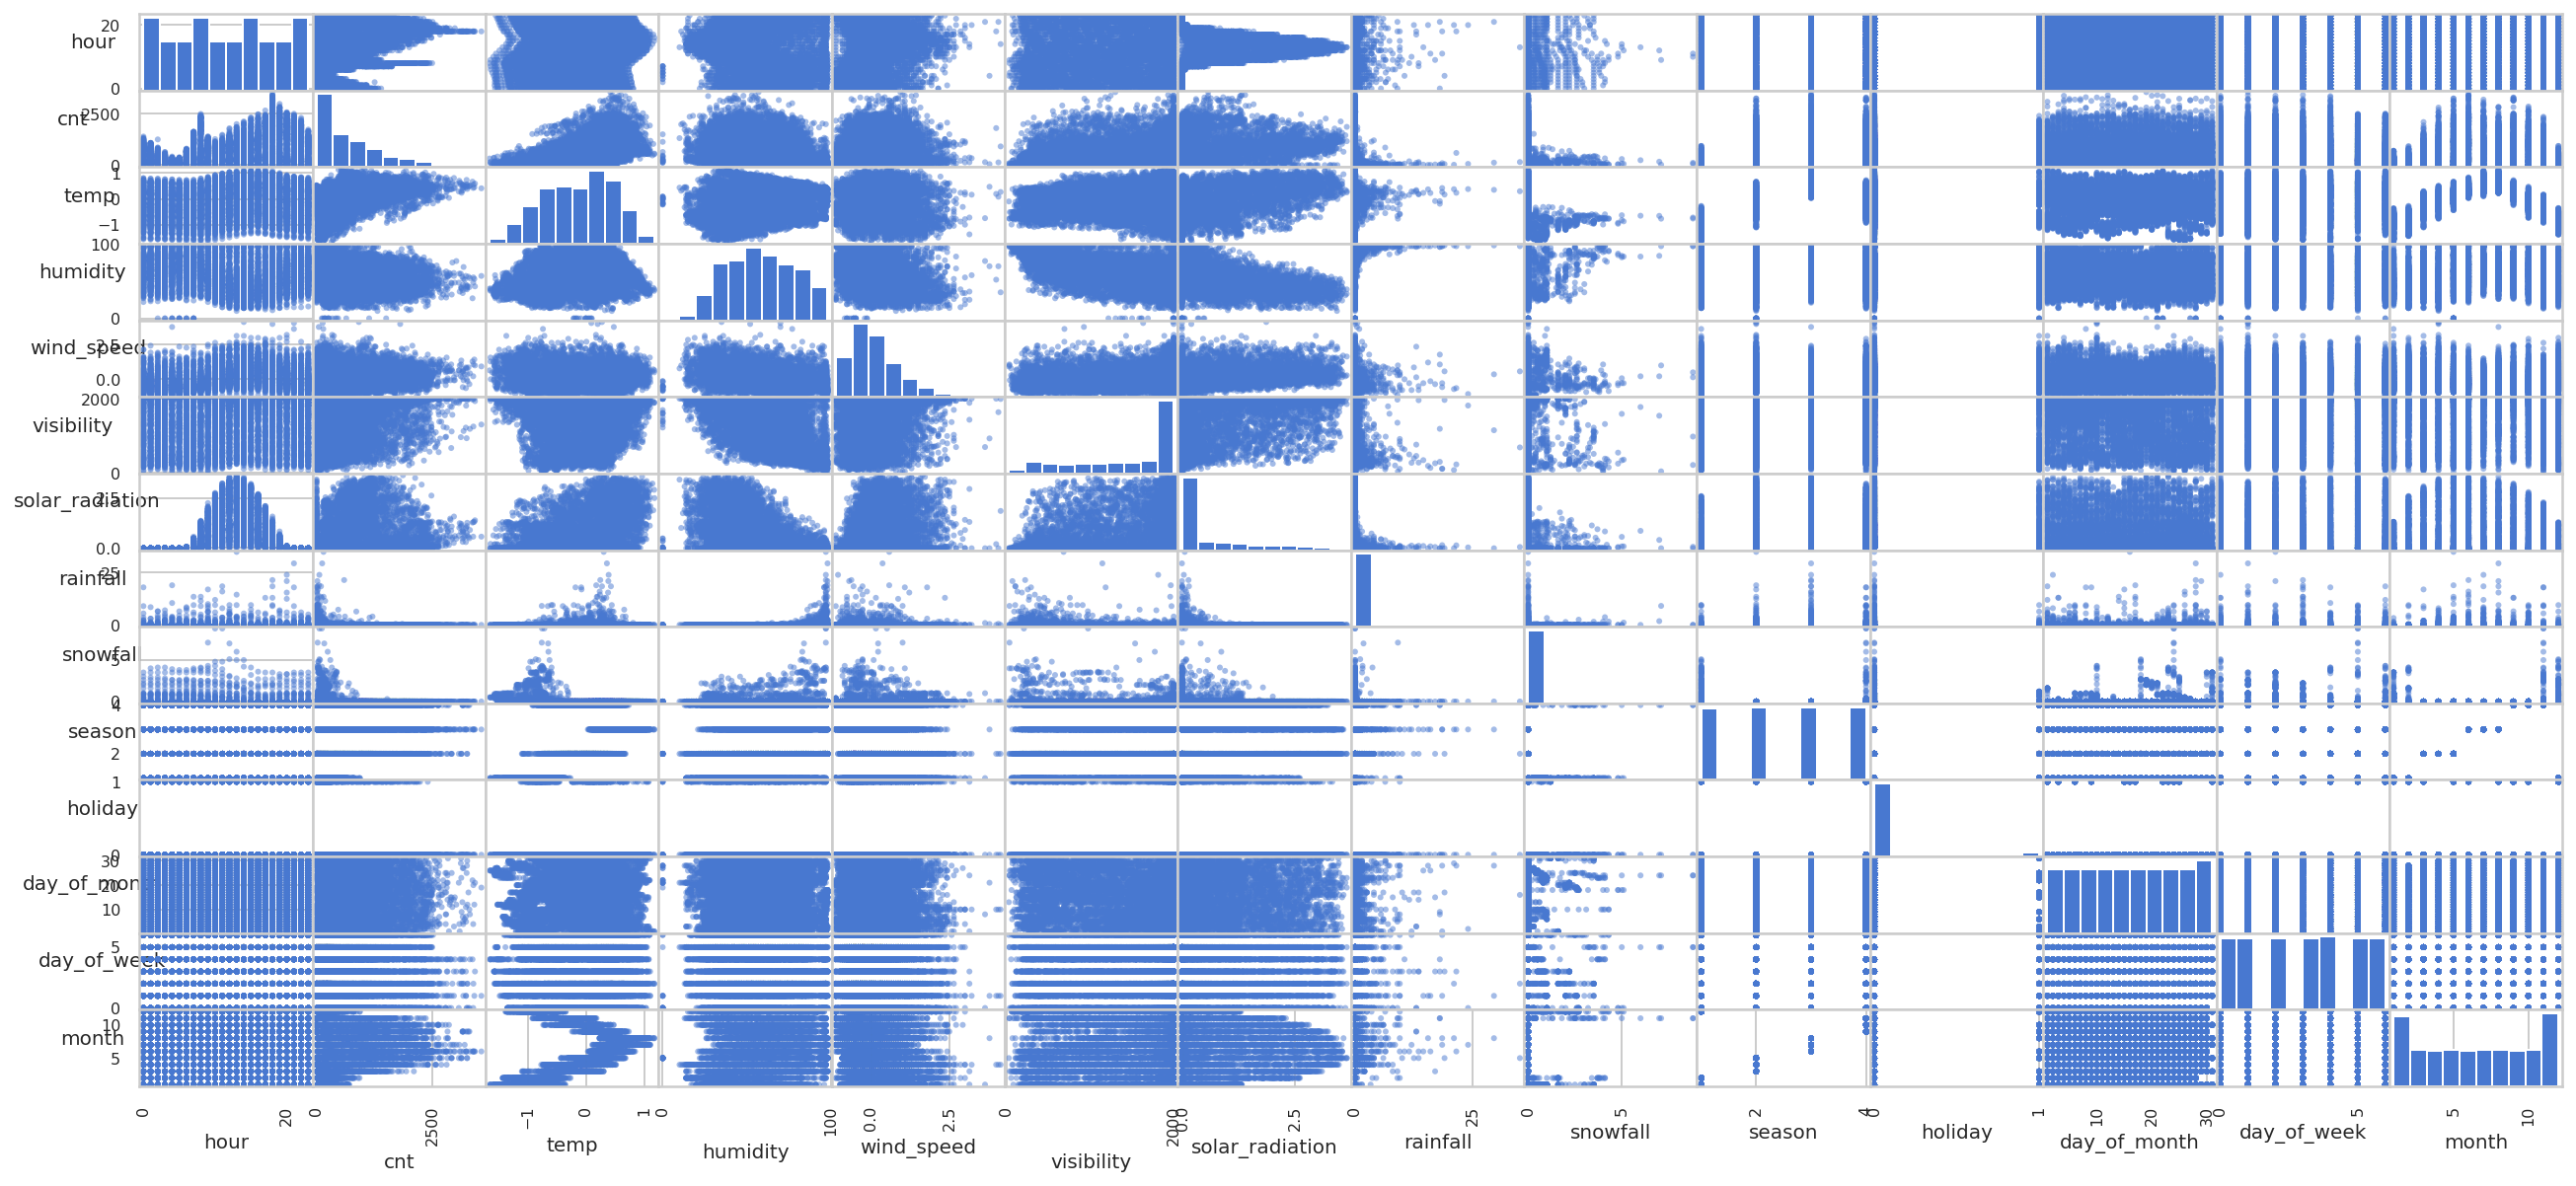

In [ ]:
scatter_matrix = pd.plotting.scatter_matrix(df)

for ax in scatter_matrix.ravel():
  ax.set_xlabel(ax.get_xlabel(), fontsize = 10)
  ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

In [ ]:
#print(df[['temp','dew_point_temp']].corr())

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)

print(X_train.shape, y_train.shape)

(7860, 24, 14) (7860,)


In [ ]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, min_delta=0, verbose=1, restore_best_weights=False)

history = model.fit(
    X_train, y_train, 
    epochs=12, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
    #callbacks=[callback]
)

Epoch 1/12
222/222 [==============================] - 7s 10ms/step - loss: 0.2640 - mse: 0.2640 - root_mean_squared_error: 0.5121 - val_loss: 0.4564 - val_mse: 0.4564 - val_root_mean_squared_error: 0.6756
Epoch 2/12
222/222 [==============================] - 1s 6ms/step - loss: 0.1960 - mse: 0.1960 - root_mean_squared_error: 0.4330 - val_loss: 0.3362 - val_mse: 0.3362 - val_root_mean_squared_error: 0.5798
Epoch 3/12
222/222 [==============================] - 1s 7ms/step - loss: 0.0936 - mse: 0.0936 - root_mean_squared_error: 0.3026 - val_loss: 0.1893 - val_mse: 0.1893 - val_root_mean_squared_error: 0.4350
Epoch 4/12
222/222 [==============================] - 2s 7ms/step - loss: 0.0683 - mse: 0.0683 - root_mean_squared_error: 0.2576 - val_loss: 0.1478 - val_mse: 0.1478 - val_root_mean_squared_error: 0.3845
Epoch 5/12
222/222 [==============================] - 2s 7ms/step - loss: 0.0583 - mse: 0.0583 - root_mean_squared_error: 0.2384 - val_loss: 0.1251 - val_mse: 0.1251 - val_root_mean_s

In [ ]:
history.history['mse']

cum_mse = 0

for loss in history.history['loss']:
  cum_mse += loss

print("MSE after %d Epochs is %s" %(len(history.history['loss']), cum_mse/len(history.history['loss'])))

#10 Epochs, 32 Batch size, 128 Neurons in LSTM, 0.2 Dropout, Adam optimizer, MSE loss, 90:10 train:test data, 0.1 validation split from train data
#MSE With all features: 0.12277173772454261
#MSE Without functioning_day: 0.11615238822996617
#MSE Without dew temp: 0.10978034436702729
#MSE Without dew temp & without functioning day: 0.10949838273227215

#50 Epochs, 32 Batch size, 128 Neurons in LSTM, 0.2 Dropout, Adam optimizer, MSE loss, 90:10 train:test data, 0.1 validation split from train data
#MSE Without dew temp & without functioning day: 0.0398875223658979

#100 Epochs, 32 Batch size, 128 Neurons in LSTM, 0.2 Dropout, Adam optimizer, MSE loss, 90:10 train:test data, 0.1 validation split from train data
#MSE Without dew temp & without functioning day: 0.026630657548084854

#Early stopping with 10 patience - Stopped at Epoch 41
#MSE: 0.04487563651509401

#Early stopping with 5 patience - Stopped at Epoch 32
#MSE: 0.05235074198571965

#Early stopping with 0 patience- Stopped at Epoch 12
#MSE: 0.09785654519995053

#12 Epochs, 128 units
#MSE: 0.09785651260366042

#12 Epochs, 24 units
#MSE: 0.1436579426129659

#12 Epochs, 32 units
#MSE: 0.13842837947110334

#12 Epochs, 256 units
#MSE: 0.10068518451104562

MSE after 12 Epochs is 0.09785666471968095


In [ ]:
history.history.keys()

dict_keys(['loss', 'mse', 'root_mean_squared_error', 'val_loss', 'val_mse', 'val_root_mean_squared_error'])

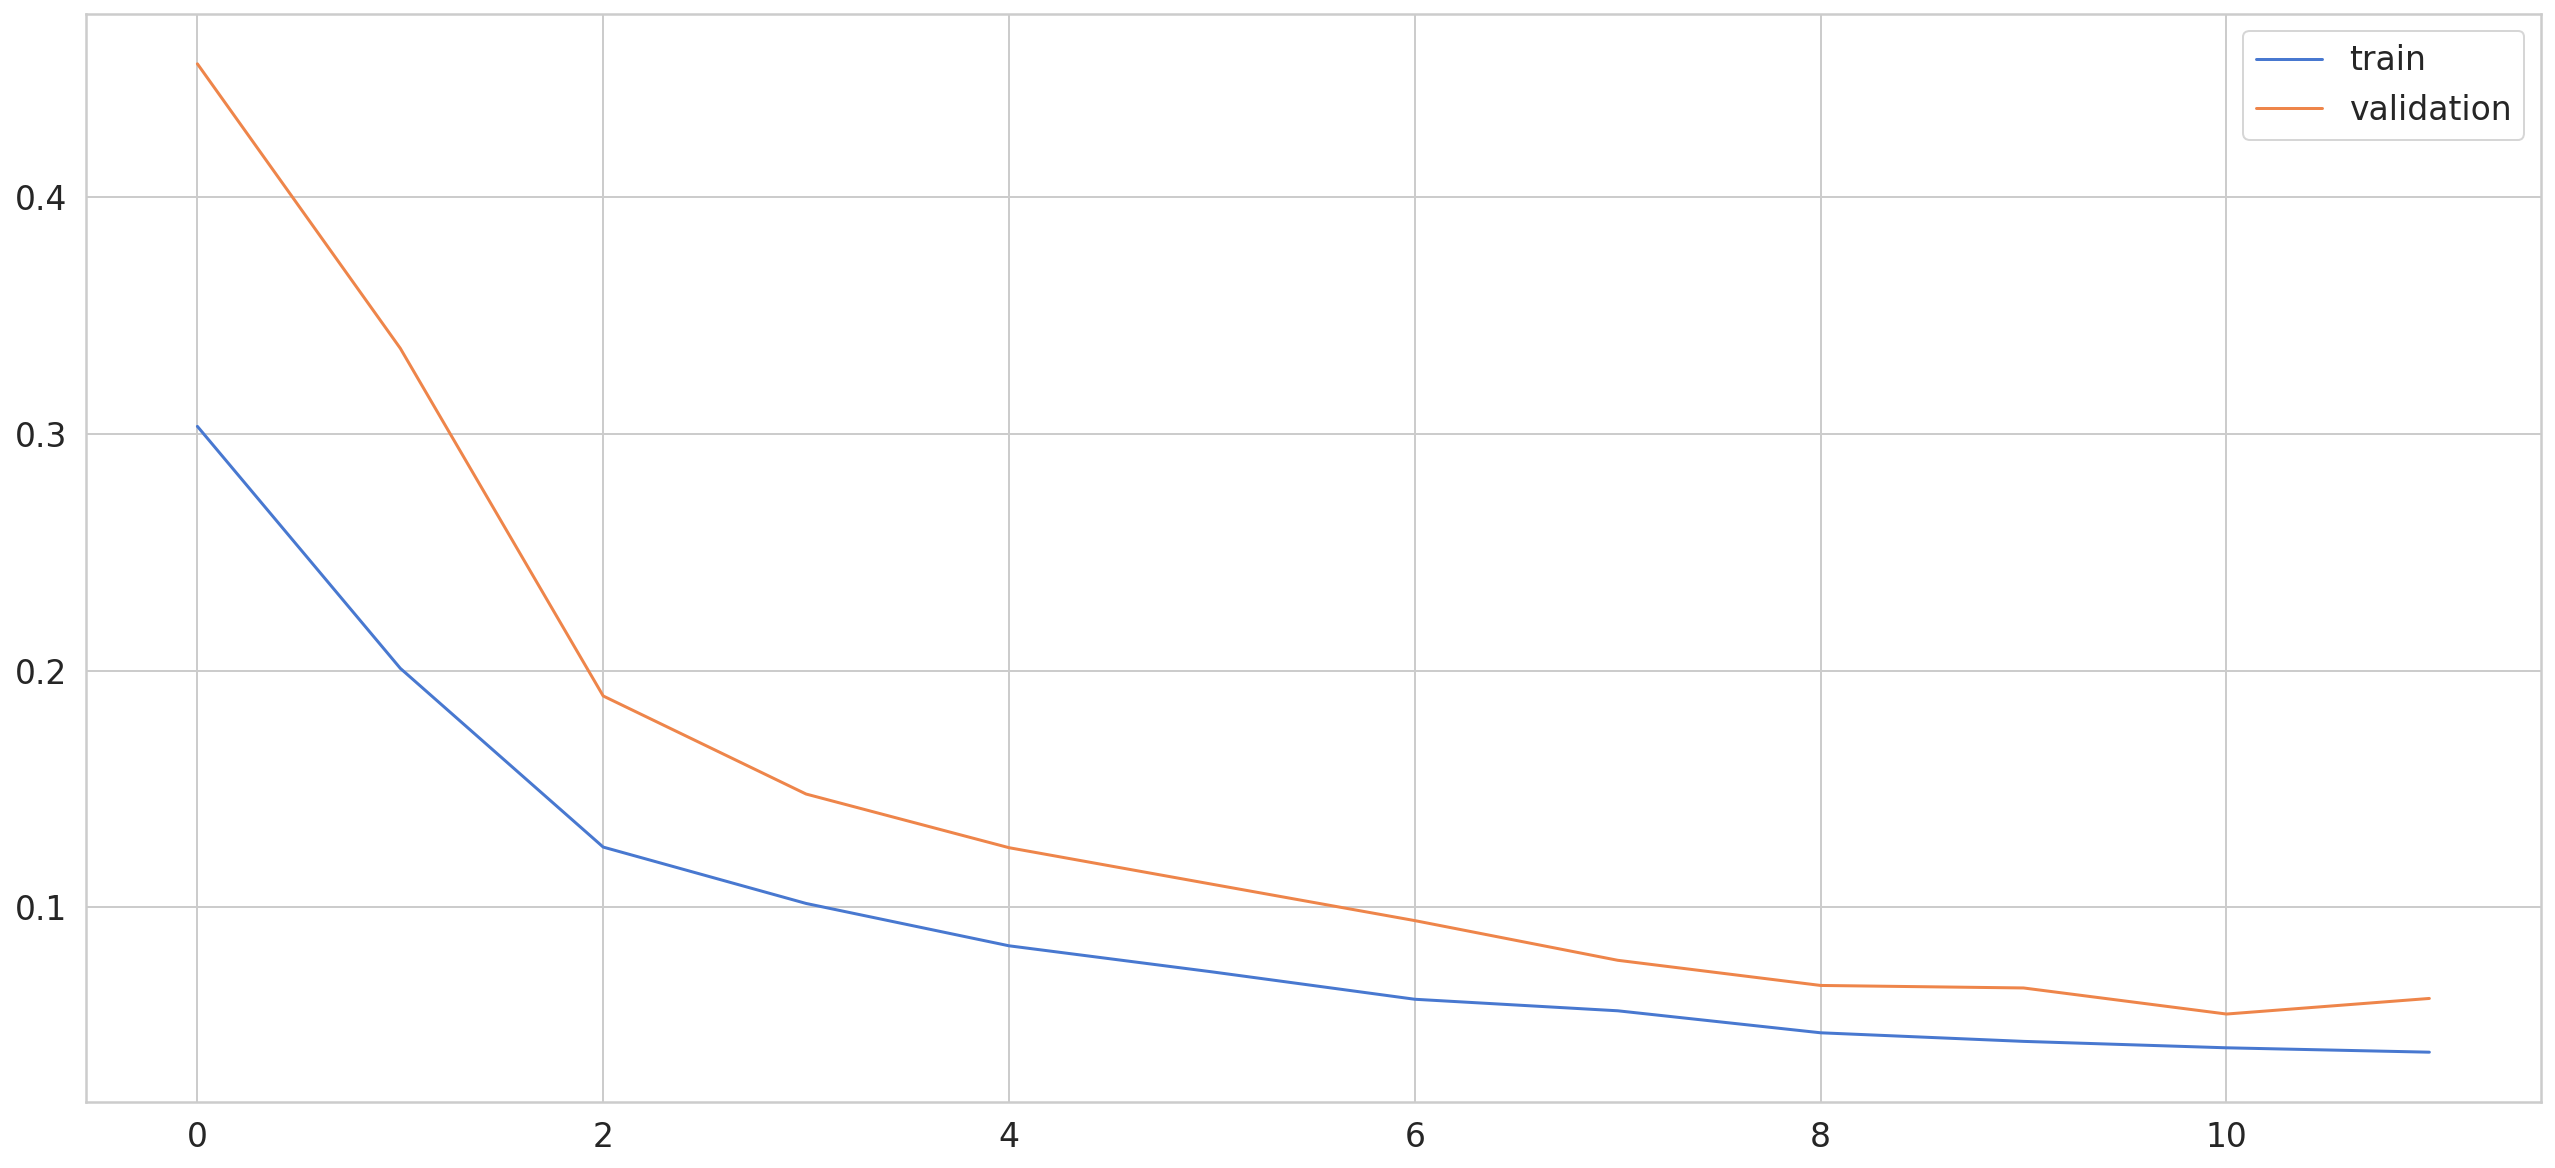

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

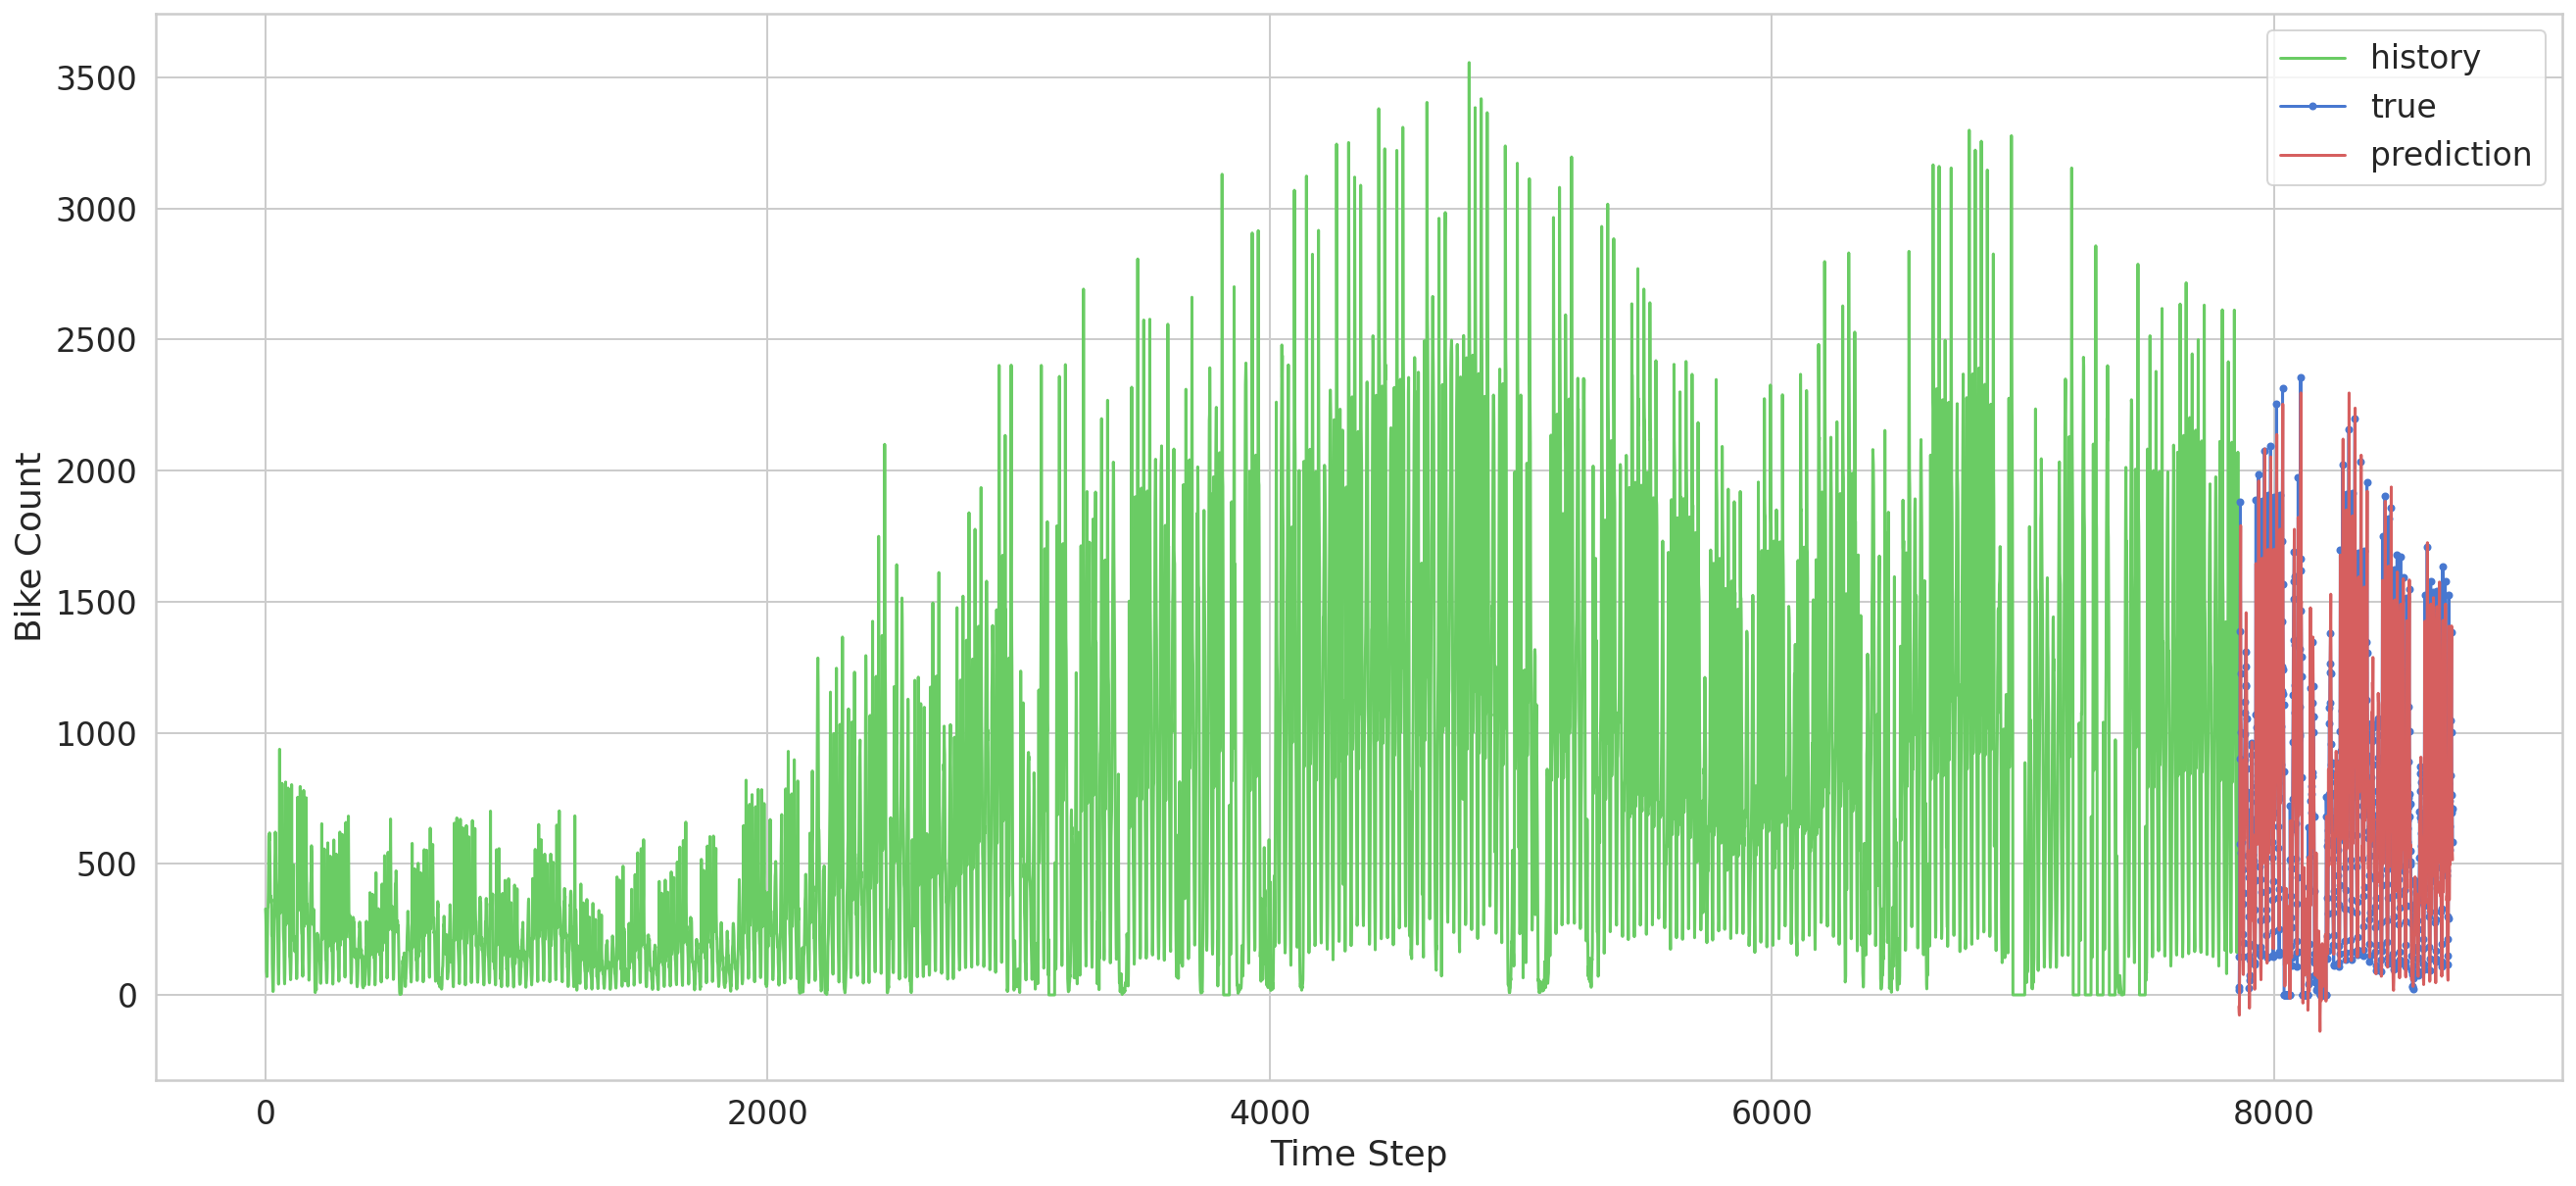

In [ ]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

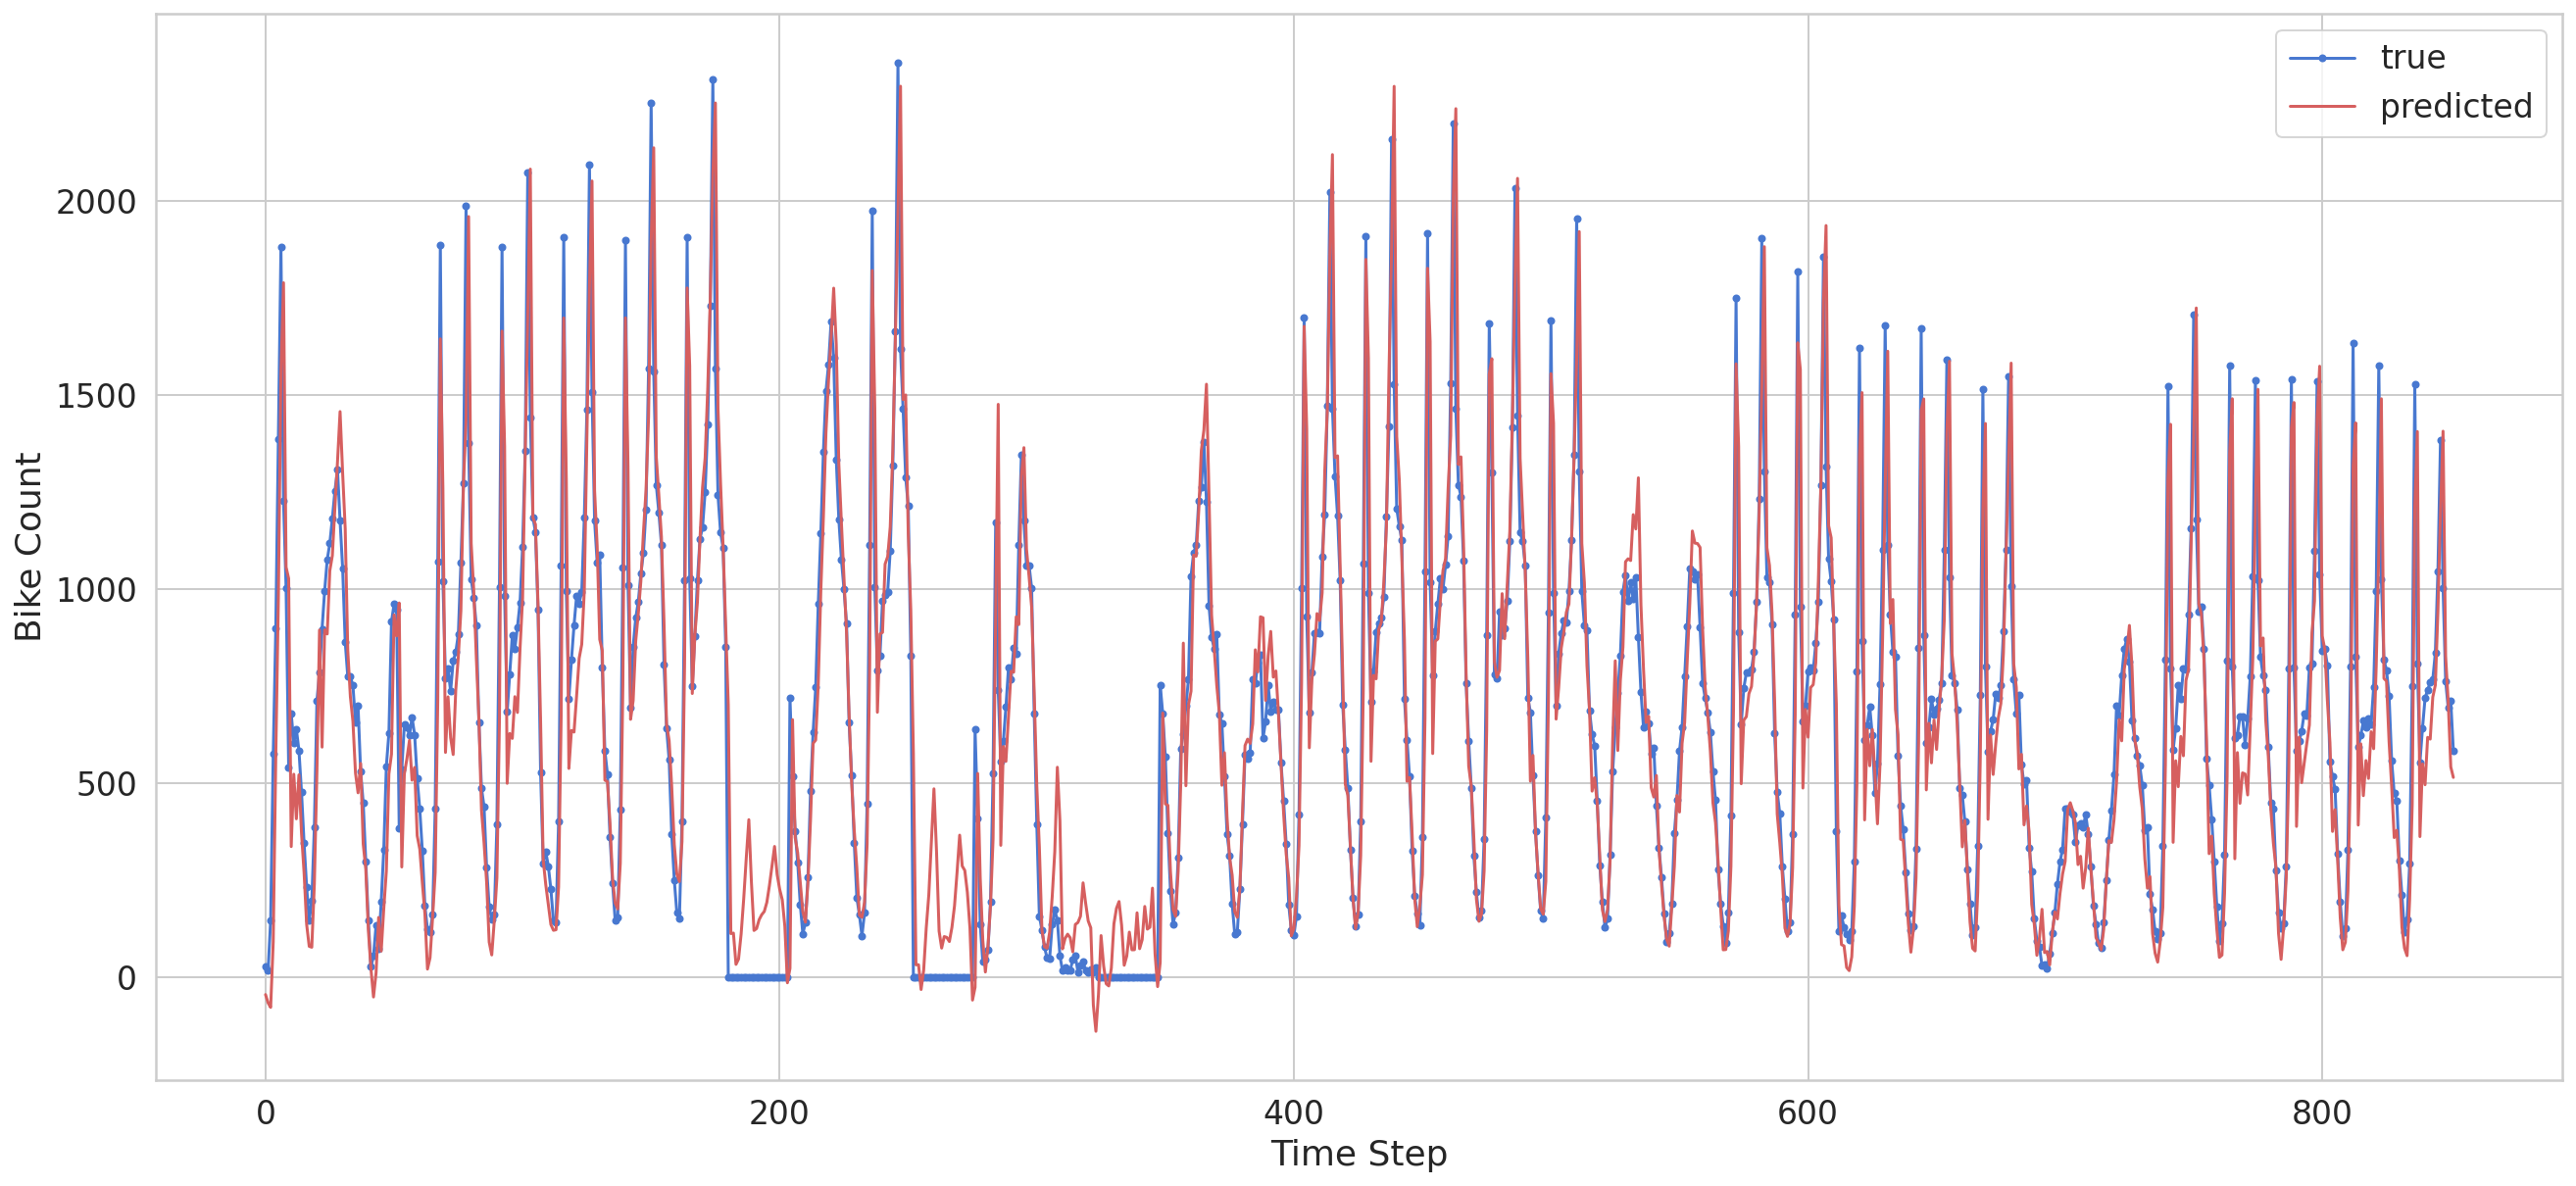

In [ ]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="predicted")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [ ]:
cum_sum = 0
eval_min = float('inf')
for i in range(len(X_test)):
  mse = (y_test.flatten()[i] - y_pred.flatten()[i])**2
  cum_sum += mse

print("Mean squared error: " + str(cum_sum/len(X_test)))

#10 Epochs, 32 Batch size, 128 Neurons in LSTM, 0.2 Dropout, Adam optimizer, MSE loss, 90:10 train:test data, 0.1 validation split from train data
#Ypred vs Ytest - MSE Without dew temp & without functioning day: 0.0577010465592839

#30 Epochs, 32 Batch size, 128 Neurons in LSTM, 0.2 Dropout, Adam optimizer, MSE loss, 90:10 train:test data, 0.1 validation split from train data
#Ypred vs Ytest - MSE With all features: 0.05136436115405618
#Ypred vs Ytest - MSE Without functioning_day: 0.024982511054527146
#Ypred vs Ytest - MSE Without dew temp: 0.022297364726625454
#Ypred vs Ytest - MSE Without dew temp & without functioning day: 0.02193838630926601

#60 Epochs, 32 Batch size, 128 Neurons in LSTM, 0.2 Dropout, Adam optimizer, MSE loss, 90:10 train:test data, 0.1 validation split from train data
#Ypred vs Ytest - MSE Without dew temp & without functioning day: 0.017572412100948953

#100 Epochs, 32 Batch size, 128 Neurons in LSTM, 0.2 Dropout, Adam optimizer, MSE loss, 90:10 train:test data, 0.1 validation split from train data
#Ypred vs Ytest - MSE Without dew temp & without functioning day: 0.01821959138578795

#Early stopping with 0 patience - Stopped at Epoch 12
#Ypred vs Ytest - MSE Without dew temp & without functioning day: 0.0482724057267709

#Early stopping with 0 patience, restore_best_weights=True - Stopped at Epoch 12
#Ypred vs Ytest - MSE Without dew temp & without functioning day: 0.03728070183217905

#Early stopping with 10 patience, restore_best_weights=True - Stopped at Epoch 37 i.e no improvement since Epoch 27 - Could stop at Epoch 20, loss improves slowly and val_loss sees signifcant spikes, signs of overfitting
#Ypred vs Ytest - MSE Without dew temp & without functioning day: 0.022894345694544002

#20 Epochs, 32 Batch size, 128 Neurons in LSTM, 0.2 Dropout, Adam optimizer, MSE loss, 90:10 train:test data, 0.1 validation split from train data
#Ypred vs Ytest - MSE Without dew temp & without functioning day: 0.02330503949650202


Mean squared error: 0.04827684497554847
